**TO PREDICT THE LENGTH OF STAY OF A PATIENT IN A HOSPITAL**

The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [2]:
# IMPORTING THE LIBRARIES
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\Meghna\Desktop\hospital data.csv")
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [6]:
df.shape

(318438, 18)

In [18]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [36]:
df.fillna(0)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


In [31]:
df["Type of Admission"].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [35]:
df["Severity of Illness"].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [37]:
df["Age"].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
Nov-20    16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [39]:
df["Department"].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

**VISUALIZATION**

In [22]:
df[["Age"].replace(to_replace="Nov-20",value="11-20",inplace=True)
df["Age"].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [25]:
df["Stay"].replace(to_replace="Nov-20",value="11-20",inplace=True)
df["Stay"].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

**VISUALIZATION**

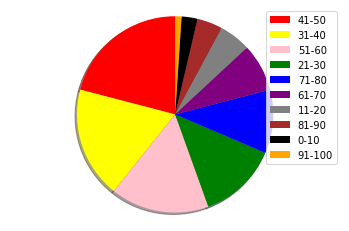

In [2]:
#VISUALISING THE AGE GROUP

labels=['41-50','31-40','51-60','21-30','71-80','61-70','11-20','81-90','0-10','91-100']
sizes=[40,35,31,25,20,15,10,8,5,2]
colors=['red','yellow','pink','green','blue','purple','grey','brown','black','orange']
patches,texts=plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(patches,labels)
plt.axis('equal')
plt.show()

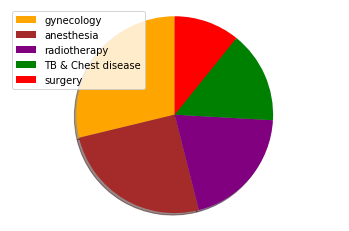

In [24]:
#VISUALISING THE DEPARTMNETS

labels=['gynecology','anesthesia','radiotherapy','TB & Chest disease','surgery']
sizes=[40,35,28,21,15]
colors=['orange','brown','purple','green','red']
patches,texts=plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(patches,labels)
plt.axis('equal')
plt.show()

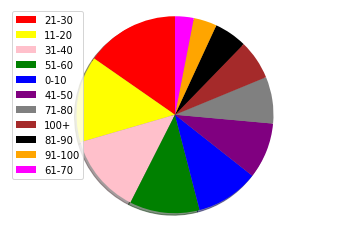

In [27]:
#VISUALISING THE NO OF DAYS OF STAY

labels=['21-30','11-20','31-40','51-60','0-10','41-50','71-80','100+','81-90','91-100','61-70']
sizes=[40,37,34,30,27,24,20,17,14,10,8]
colors=['red','yellow','pink','green','blue','purple','grey','brown','black','orange','magenta']
patches,texts=plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(patches,labels)
plt.axis('equal')
plt.show()

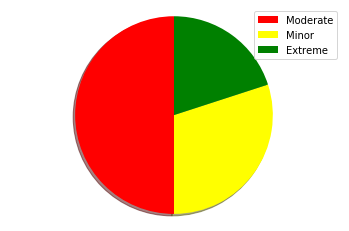

In [3]:
labels=['Moderate','Minor','Extreme']
sizes=[50,30,20]
colors=['red','yellow','green']
patches,texts=plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(patches,labels)
plt.axis('equal')
plt.show()

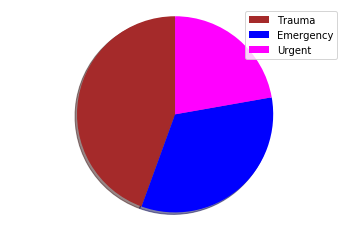

In [31]:
labels=['Trauma','Emergency','Urgent']
sizes=[40,30,20]
colors=['brown','blue','magenta']
patches,texts=plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(patches,labels)
plt.axis('equal')
plt.show()

**FEATURE SET**

In [4]:
df["Severity of Illness"]=df["Severity of Illness"].astype('category')
df["Severity of Illness"] =df["Severity of Illness"].cat.codes
df["Type of Admission"]=df["Type of Admission"].astype('category')
df["Type of Admission"]=df["Type of Admission"].cat.codes
df["Age"]=df["Age"].astype('category')
df["Age"]=df["Age"].cat.codes
df["Stay"]=df["Stay"].astype('category')
df["Stay"]=df["Stay"].cat.codes
df.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,0,0,2,4,4911,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,1,0,2,4,5954,3
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,1,0,2,4,4745,2
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,1,0,2,4,7272,3
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,1,0,2,4,5558,3


In [5]:
#independent variales
x=df[['Age','Severity of Illness','Type of Admission']].values
x[0:5]

array([[4, 0, 0],
       [4, 0, 1],
       [4, 0, 1],
       [4, 0, 1],
       [4, 0, 1]], dtype=int8)

In [6]:
#selecting the dependent variable
y=df["Stay"].values
y[0:5]

array([0, 3, 2, 3, 3], dtype=int8)

**TRAIN TEST SPLIT**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (254750, 3) (254750,)
Test set: (63688, 3) (63688,)


**K nearest Neighbor(KNN)**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n=KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
yhat=n.predict(x_test)
print("Train: ",accuracy_score(y_train,n.predict(x_train)))
print("Test: ",accuracy_score(y_test,yhat))

Train:  0.23307163886162904
Test:  0.23255558346941338


In [25]:
yhat

array([0, 1, 1, ..., 0, 1, 1], dtype=int8)

In [9]:
from sklearn import metrics
Ks = 10
scores=[]
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, yhat))
print(scores)

[0.2128501444542143, 0.2165871121718377, 0.22921115437759076, 0.23255558346941338, 0.24013942971988445, 0.23221014947870872, 0.23778419796507977, 0.24452016078382113, 0.25113051124230623]


From the array of accuracy scores we can see that the score at index 9 is the highest,so we can take k=9.

In [22]:
n1=KNeighborsClassifier(n_neighbors=9).fit(x_train,y_train)
yhat1=n1.predict(x_test)
print("Train:",metrics.accuracy_score(y_train,n1.predict(x_train)))
print("Test:",metrics.accuracy_score(y_test,yhat1))

Train: 0.2515485770363101
Test: 0.25113051124230623


**CONCLUSION**

As we can see the difference between the train and test scores are very less. So by using this KNN algorithm we can predict the length of stay of patients in a hospital.